# Task 1

In [8]:
import csv

In [9]:
vehicles = {('Vehicle Make'), ('Vehicle Model'), ('Vehicle Year'), ('Vehicle Type')}
ccard = {('Credit Card Start Date'), ('Credit Card Expiry Date'), ('Credit Card Number'), ('Credit Card CVV'), ('Bank IBAN')}
address = {('Address Street'), ('Address City',), ('Address Postcode')}
work = {('Yearly Pension (Â£)'), ('Retired'), ('Yearly Salary (Â£)',), ('Distance Commuted to Work (miles)'), ('Employer Company')}
personal = {('Age (Years)'),  ('Dependants'), ('First Name'), ('Last Name'), ('Marital Status'), ('Sex')}

In [10]:

#cast these attributes to thier data types

vehicles = {('Vehicle Make', str), ('Vehicle Model', str), ('Vehicle Year', int), ('Vehicle Type', str)}
ccard = {('Credit Card Start Date', str), ('Credit Card Expiry Date', str), ('Credit Card Number', str), ('Credit Card CVV', int), ('Bank IBAN', str)}
address = {('Address Street', str), ('Address City', str), ('Address Postcode', str)}
work = {('Yearly Pension (Â£)', int), ('Retired', lambda val: True if val=='True' else False), ('Yearly Salary (Â£)', int), ('Distance Commuted to Work (miles)', float), ('Employer Company', str)}
personal = {('Age (Years)', int),  ('Dependants', lambda val: None if val.strip()=='' else int(val)), ('First Name', str), ('Last Name', str), ('Marital Status', str), ('Sex', str)}

# Task 2

In [11]:
file = 'acw_user_data.csv'

def ext_attrs(attr_batch):
    return {attr:dtype(row[attr]) for attr, dtype in attr_batch}


with open(file) as f:
    csv_obj = csv.DictReader(f)
    
    processed_json = []
    for row in csv_obj:
        rich_row = {
            'vehicle':ext_attrs(vehicles),
            'ccard':ext_attrs(ccard),
            'address':ext_attrs(address),
            'work':ext_attrs(work),
            'personal':ext_attrs(personal)
        }

        processed_json.append(rich_row)

    print(processed_json[:3])

[{'vehicle': {'Vehicle Type': 'Pickup', 'Vehicle Make': 'Hyundai', 'Vehicle Year': 2009, 'Vehicle Model': 'Bonneville'}, 'ccard': {'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571', 'Credit Card Expiry Date': '11/27', 'Credit Card Start Date': '08/18', 'Credit Card Number': '676373692463'}, 'address': {'Address Postcode': 'S71 7XZ', 'Address City': 'Lake Conor', 'Address Street': '70 Lydia isle'}, 'work': {'Yearly Pension (Â£)': 7257, 'Yearly Salary (Â£)': 72838, 'Employer Company': 'N/A', 'Retired': True, 'Distance Commuted to Work (miles)': 0.0}, 'personal': {'Age (Years)': 89, 'Dependants': 3, 'First Name': 'Kieran', 'Marital Status': 'married or civil partner', 'Sex': 'Male', 'Last Name': 'Wilson'}}, {'vehicle': {'Vehicle Type': 'Coupe', 'Vehicle Make': 'Nissan', 'Vehicle Year': 1996, 'Vehicle Model': 'ATS'}, 'ccard': {'Credit Card CVV': 583, 'Bank IBAN': 'GB37UMCO54540228728019', 'Credit Card Expiry Date': '11/26', 'Credit Card Start Date': '08/12', 'Credit Card Number

# Task 3

In [12]:
err_list = [index for index, row in enumerate(processed_json, 2) if row['personal']['Dependants'] is None]
print(f"Problematic rows for dependants: {err_list}")

Problematic rows for dependants: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]


# Task 4

In [13]:
#Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [14]:
import json

with open('processed.json', 'w') as f:
    json.dump(processed_json, f)

# Task 5

In [15]:
employed_json = [row for row in processed_json if not row['work']['Retired']]
retired_json = [row for row in processed_json if row['work']['Retired']]

with open('retired.json', 'w') as retired_file, open('employed.json','w') as employed_file:
    json.dump(retired_json, retired_file), json.dump(employed_json, employed_file)

# Task 6

In [18]:
#remove_ccard.json
# remove_ccard.json
def is_ccard_correct(row):
    return int(row['ccard']['Credit Card Expiry Date'][3:]) - int(row['ccard']['Credit Card Start Date'][3:]) > 10
remove_ccard_json = [row for row in processed_json if is_ccard_correct(row)]
with open('remove_ccard.json', 'w') as f:
    json.dump(remove_ccard_json, f)

# Task 7

In [20]:
#salary commute

def salary_com(row):
    commute = row['work']['Distance Commuted to Work (miles)']
    
    salary = row['work']['Yearly Salary (Â£)']

    if commute <2:
        return salary
    return salary/commute

for row in processed_json:
    row['work']['Salary-Commute'] = salary_com(row)
    
sort_key = lambda row: row['work']['Salary-Commute']
processed_json.sort(key=sort_key)
with open('commute.json', 'w') as f:
    json.dump(processed_json, f)

# PART B- DATA VISUALIZATION

# TASK 1

In [22]:
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv('acw_user_data.csv')


In [25]:
df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [26]:
salary = df['Yearly Salary (£)']
age = df['Age (Years)']

print(f"Mean Salary: {salary.mean()}")
print(f"Median Age: {age.median()}")

Mean Salary: 57814.078
Median Age: 54.0


# Task 2

15


<AxesSubplot:xlabel='Age (Years)', ylabel='Count'>

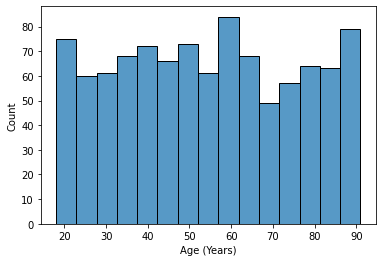

In [27]:
import math
bins = math.ceil((age.max() - age.min())/5)
print(bins)

sns.histplot(x = age, bins = bins)

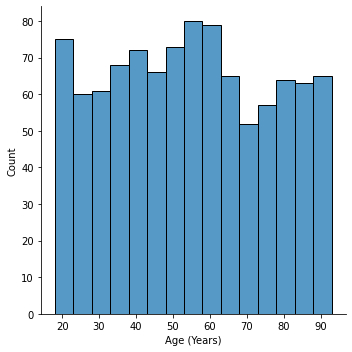

In [30]:
sns.displot(df, x='Age (Years)', binwidth=5)

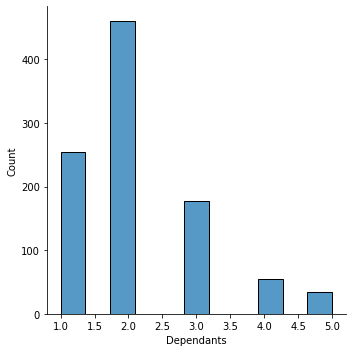

In [32]:
sns.displot(df, x='Dependants')

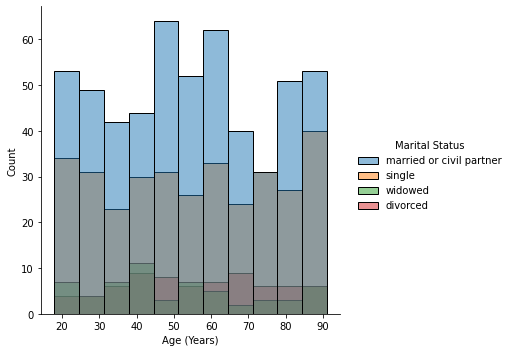

In [34]:
sns.displot(df, x='Age (Years)', hue='Marital Status')

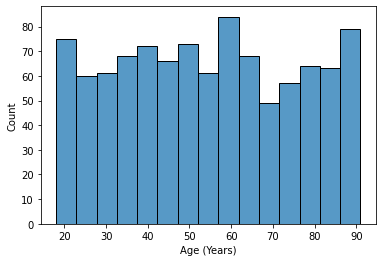

In [37]:
figure_obj = sns.histplot(x = age, bins = bins)
figure_obj.get_figure().savefig('myfig.png')

In [38]:
import os
os.getcwd()

'C:\\Users\\Dell\\Downloads'